# **PROJECT TITLE: HATE AND OFFENSIVE LANGUAGE DETECTION**

![Hate_Speech](Images/Hate_Speech.jpg)

# **PROJECT OVERVIEW**

Online hate speech and offensive language are increasing on social media, creating hostile environments and negatively affecting mental health. This project aims to develop a machine learning model that accurately detects hate speech and offensive language in tweets. Using a labeled dataset of 24,783 tweets, natural language processing techniques such as tokenization, stopword removal, and vectorization are applied. Supervised learning algorithms, including Logistic Regression and XGBoost, are trained to classify tweets into hate speech, offensive, or neutral categories. The resulting solution can help social media platforms, researchers, and policymakers reduce harmful content, improve user experience, and promote safer online interactions.


# **PROBLEM STATEMENT**

Online hate speech and offensive language on social media are increasing, exposing users to harmful content and creating hostile environments. Existing moderation methods, both manual and automated, are often slow or inaccurate, leaving a gap in effective detection. This project seeks to address this problem by developing a machine learning model that can automatically identify hate speech and offensive language in tweets, helping platforms maintain safer online communities.



# **OBJECTIVES**

1. To identify linguistic patterns and characteristics associated with harmful content in tweets, including hate speech and offensive language.

2. To classify tweets as harmful or non-harmful .

3. To analyze linguistic feature and trends that distinguish harmful tweets from non-harmful,supporting automated content moderation. 

4. To assess the frequency and distribution of hate speech across the dataset.

In [34]:
# Importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support,roc_curve, auc 

# **1. DATA LOADING AND EVALUATION**

In [3]:
# Loading the dataset
Hate_Speech = pd.read_csv('Data/train.csv')
Hate_Speech.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


**Interpratation of the dataset:**

**Count:** The number of human annotators who labeled the tweet.

**Hate_speech_count:** The number of annotators who labelled the speech as hatespeech.

**offensive_language_count:** How many annotators said the language contained offensive lanuage but not hatespeech.

**neither_count:** How many annotators claimed it contained neither hatespeech nor offensive language.

**Class:** This is the majority vote result and the column I should use as My target.

**Tweet:** Actual tweet text.

In [4]:
# Information of the dataset
Hate_Speech.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   count                     24783 non-null  int64 
 1   hate_speech_count         24783 non-null  int64 
 2   offensive_language_count  24783 non-null  int64 
 3   neither_count             24783 non-null  int64 
 4   class                     24783 non-null  int64 
 5   tweet                     24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


In [5]:
# Shape of the dataset
Hate_Speech.shape

(24783, 6)

The dataset has 6 columns and 24783 rows.

In [6]:
# Summary statistics of the datset
Hate_Speech.describe()

,count,hate_speech_count,offensive_language_count,neither_count,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.883060,0.631851,1.399459,1.113299,0.462089
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,9.000000,2.000000


In [7]:
# Checking for missing values
Hate_Speech.isnull().sum()

count                       0
hate_speech_count           0
offensive_language_count    0
neither_count               0
class                       0
tweet                       0
dtype: int64

This shows there are no missing values in the dataset.

In [8]:
Hate_Speech.duplicated().sum()

np.int64(0)

There  are no duplicated.


# **EXPLORATORY DATA ANALYSIS(EDA)**
This sections represents data in

### **1. UNIVARIATE ANALYSIS**
#### Checking for distribution of the data and visualizing it.

#### Univariate analysis is the simplest form of data analysis — it examines just one variable at a time.

#### Purpose: To understand the distribution, central tendency (mean, median), and spread (range, standard deviation) of a single variable.

#### Examples include: Bar Graphs, Histogram, Box Plot, Pie Chart

**a.) Categorical Variable**

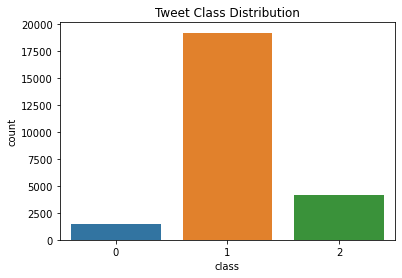

In [7]:
# Bar plot: Counts per class
sns.countplot(x='class', data=Hate_Speech)
plt.title("Tweet Class Distribution")
plt.show()

The plot shows the distribution of tweets across the two classes:

Harmful content

Non-Harmful content

The Harmful content has significanttlly more samples than the Non-harmful class.

This shows the class has an imbalance.

**b.) Numeric Variables**

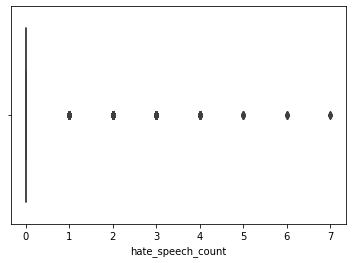

In [8]:
sns.boxplot(x='hate_speech_count', data=Hate_Speech)
plt.show()


**c) Text Data**

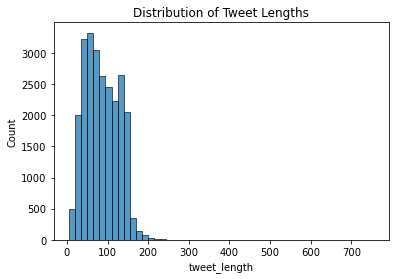

In [9]:
Hate_Speech['tweet_length'] = Hate_Speech['tweet'].apply(len)
sns.histplot(Hate_Speech['tweet_length'], bins=50)
plt.title("Distribution of Tweet Lengths")
plt.show()


### **2. BIVARIATE ANALYSIS**
#### Checking for correlations; multiple Xs and Y

#### Bivariate analysis explores the relationship between two variables.

#### Purpose: To identify whether and how the variables are related — for example, does one increase when the other does?

#### Examples include: Heatmaps, Line Graphs,Bar Plot, Scatter Plot .

**a) Numeric vs Categorical**

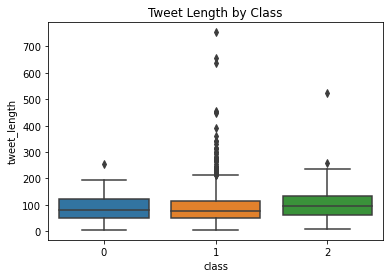

In [10]:
# Average tweet length by class
sns.boxplot(x='class', y='tweet_length', data=Hate_Speech)
plt.title("Tweet Length by Class")
plt.show()


**b) Numeric vs Numeric**

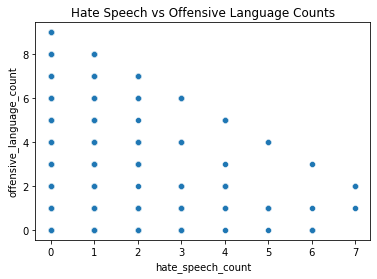

In [11]:
# Correlation between counts
sns.scatterplot(x='hate_speech_count', y='offensive_language_count', data=Hate_Speech)
plt.title("Hate Speech vs Offensive Language Counts")
plt.show()


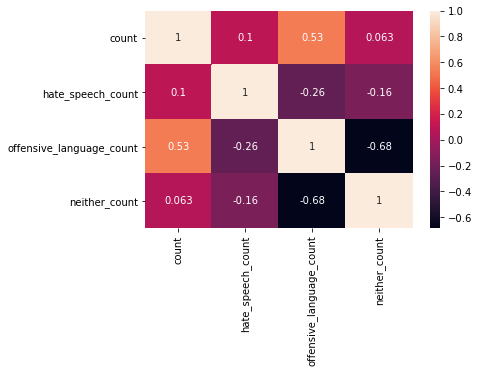

In [12]:
# Heatmap: Correlation between numeric columns
sns.heatmap(Hate_Speech[['count','hate_speech_count','offensive_language_count','neither_count']].corr(), annot=True)
plt.show()


### **3. MULTIVARIATE ANALYSIS**

#### A way of exploring how three or more variables (characteristics) relate to each other at the same time.

#### Purpose: To understand complex relationships and interactions among multiple variables.

#### Examples include: Heatmaps, Scatterplots, Pairplots, 3D Scatter Plot, Parallel Coordinates Plot


***a) Numeric vs Numeric vs Categorical**

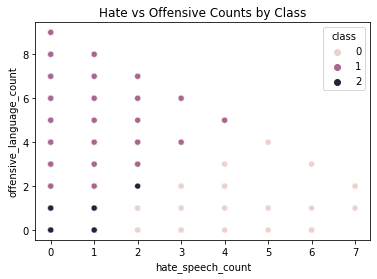

In [13]:
# Scatterplot with class as hue
sns.scatterplot(x='hate_speech_count', y='offensive_language_count', hue='class', data=Hate_Speech)
plt.title("Hate vs Offensive Counts by Class")
plt.show()


**b) Tweet Length vs Counts vs Class**

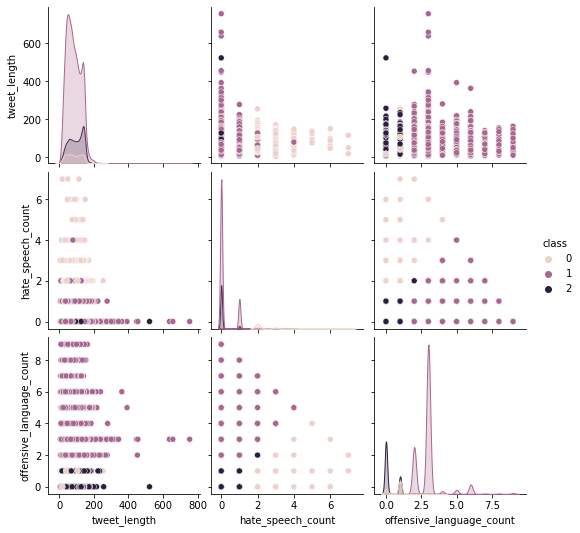

In [14]:
# scatter plot or pair plot
sns.pairplot(Hate_Speech[['tweet_length','hate_speech_count','offensive_language_count','class']], hue='class')
plt.show()


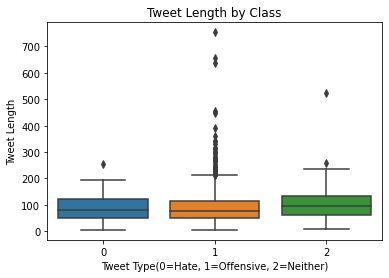

In [15]:
# Create a new column for tweet length
Hate_Speech['tweet_length'] = Hate_Speech['tweet'].apply(len)

# Plot for Tweet length
sns.boxplot( x='class', y='tweet_length', data=Hate_Speech)
plt.title("Tweet Length by Class")
plt.xlabel("Tweet Type(0=Hate, 1=Offensive, 2=Neither)")
plt.ylabel("Tweet Length")
plt.show()

# **DATA MODELLING**
Modelling refers to the process of selecting,training and evaluatuating machine learning algorithims to classify text into hate,offensive or neutral categories.


**1. Prepare the data for modelling.**

-Splitting the data into training and testing sets to evaluate model performance.

In [14]:
X = Hate_Speech["tweet"]
y = Hate_Speech["class"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

**2. Convert text to numbers**

-This is beacause models do not understand numbers.

In [19]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf =vectorizer.transform(X_test)

TF-ID was used to represent text numerically based on woprd importance.

**3. Choose and Train a Model**

In [21]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

I chose logistic regression because of its effectiveness and interpretability for text classification.

**4.Make predictions**

In [24]:
y_pred = model.predict(X_test_tfidf)

**5. Evaluate the model**

In [26]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.17      0.26       290
           1       0.91      0.96      0.94      3832
           2       0.84      0.81      0.83       835

    accuracy                           0.89      4957
   macro avg       0.76      0.65      0.67      4957
weighted avg       0.88      0.89      0.88      4957

[[  49  210   31]
 [  40 3693   99]
 [   4  151  680]]


**Class 0: Hate speech**

Precision: 0.53 → Only 53% of predicted hate speech was actually hate speech

Recall: 0.17 → Model detected only 17% of all actual hate speech → very low

F1-score: 0.26 → Overall poor performance

Support: 290 → Few samples → likely class imbalance is the reason

Interpretation:
The model struggles to detect hate speech. Most hate speech is being misclassified as offensive or neutral.

**Class 1: Offensive language**

Precision: 0.91 → 91% of predicted offensive were correct

Recall: 0.96 → 96% of actual offensive were correctly detected

F1-score: 0.94 → Excellent performance

Support: 3832 → Majority class

Interpretation:
The model does very well on the majority class (offensive language). This is why overall accuracy is high.

**Class 2: Neither**

Precision: 0.84 → 84% of predictions correct

Recall: 0.81 → 81% of actual neutral detected

F1-score: 0.83 → Good performance

Support: 835 → Medium-sized class

Interpretation:
The model is reasonably good at detecting neutral text.

**Overall Accuracy**

Accuracy: 0.89 → 89% of all predictions are correct

Macro avg: 0.76 → Average across classes ignoring class size

Weighted avg: 0.88 → Average weighted by class size

Interpretation:
The overall accuracy looks good, but macro average shows the model performs poorly on minority class (hate speech). This is typical with imbalanced datasets.

Row 0: Hate speech

49 correctly predicted

210 predicted as offensive

31 predicted as neutral

Row 1: Offensive

3693 correctly predicted

40 predicted as hate

99 predicted as neutral

Row 2: Neither

680 correctly predicted

151 predicted as offensive

4 predicted as hate

Interpretation:

Most errors for hate speech → misclassified as offensive

Neutral text sometimes misclassified as offensive

Offensive language is detected very accurately

**6. Handling class Imbalance**

In [27]:
model = LogisticRegression(class_weight="balanced",max_iter=1000)

Class weights were used to improve detection of minority classes.

**Fit the model again**

In [28]:
model = LogisticRegression(class_weight="balanced", max_iter=1000)
model.fit(X_train_tfidf, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

In [29]:
y_pred = model.predict(X_test_tfidf)


In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.846076255799879
[[ 182   70   38]
 [ 382 3245  205]
 [  32   36  767]]
              precision    recall  f1-score   support

           0       0.31      0.63      0.41       290
           1       0.97      0.85      0.90      3832
           2       0.76      0.92      0.83       835

    accuracy                           0.85      4957
   macro avg       0.68      0.80      0.72      4957
weighted avg       0.89      0.85      0.86      4957



After applying class weighting to handle class imbalance, the Logistic Regression model improved detection of the minority class (hate speech). Recall for hate speech increased from 17% to 63%, while maintaining high performance for offensive and neutral classes. Overall accuracy slightly decreased to 84.6%, reflecting the trade-off between majority and minority class performance. The model is now better balanced and fairer across all classes.

**Confusion Matrix Heatmap**

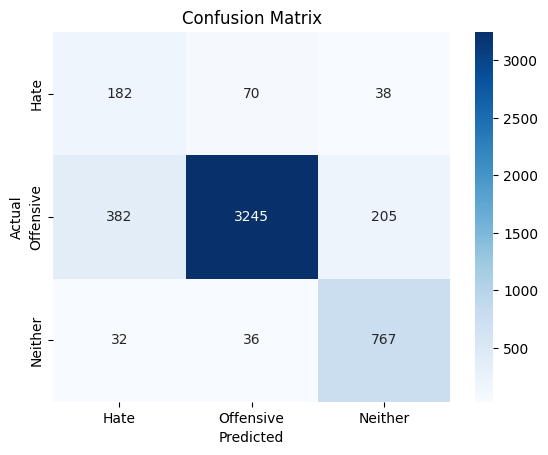

In [31]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Hate", "Offensive", "Neither"],
            yticklabels=["Hate", "Offensive", "Neither"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Precision, Recall, F1 Bar Chart**

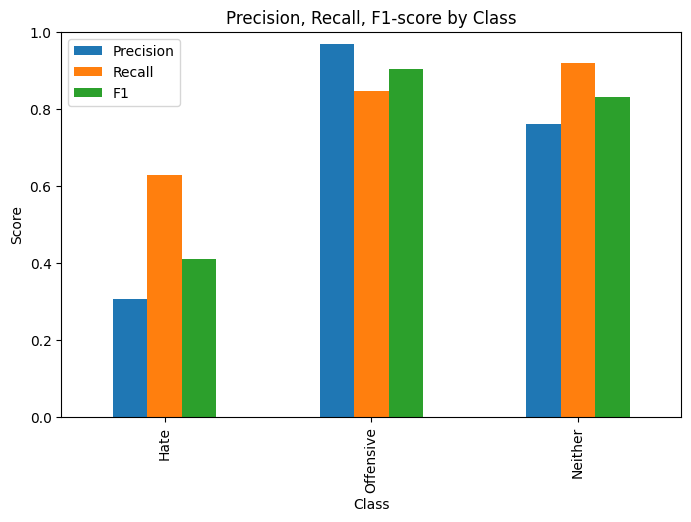

In [33]:
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred)

metrics_df = pd.DataFrame({
    "Class": ["Hate", "Offensive", "Neither"],
    "Precision": precision,
    "Recall": recall,
    "F1": f1
})

metrics_df.plot(x="Class", kind="bar", figsize=(8,5), ylim=(0,1))
plt.title("Precision, Recall, F1-score by Class")
plt.ylabel("Score")
plt.show()

show improvements after handling class imbalance.